In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# 1. データの読み込み
# ファイル名を指定してください。アップロードされたファイル名が 'test2.xlsx - Sheet1.csv' であると仮定します。
try:
    df = pd.read_excel('test2.xlsx')
    print("データが正常に読み込まれました。")
    print("データの最初の5行:\n", df.head())
    print("\nデータの情報:\n")
    df.info()
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

# 列名が日本語の場合、アクセスしやすいように英語にリネームすることも検討します。
# 例: df.columns = ['Hanekin_Ratio', 'Doping_Concentration', 'Resistance_Reduction']
# 現在のファイルではカラム名が自動的に付与されている可能性もあるため、df.head()で確認が必要です。
# もしカラム名が 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2' のようになっている場合は、適切にリネームします。
# 仮にA,B,C列にデータが入っており、ヘッダーがない場合を想定して、ilocでアクセスします。
# 実際にはデータの内容を見て調整が必要です。

# ユーザーの説明に基づき、A列が半金比率、B列がドーピング濃度、C列が抵抗減少量と仮定
# CSVにヘッダーがない場合、Pandasはデフォルトで0, 1, 2などのインデックスを列名として割り当てます。
# そのため、ここでは直接列番号でアクセスします。
# もしファイルにヘッダー行がある場合は、df.columnsで適切な列名を確認し、その列名を使用してください。
X = df.iloc[:, :2]  # 最初の2列 (A列とB列) を入力変数とする
y = df.iloc[:, 2]   # 3列目 (C列) を目的変数とする

print(f"\n入力変数 (X) の最初の5行:\n{X.head()}")
print(f"\n目的変数 (y) の最初の5行:\n{y.head()}")


# 2. データの前処理 (欠損値の確認)
print("\n欠損値の確認:\n", df.isnull().sum())
# もし欠損値がある場合は、補完（平均値、中央値など）や削除を検討します。
# 例: df.fillna(df.mean(), inplace=True)


# 3. モデルの選択と学習
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressorをモデルとして選択
# (他のモデルも試すことができます: LinearRegression, SVRなど)
model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimatorsは木の数

print("\nモデルの学習を開始します...")
model.fit(X_train, y_train)
print("モデルの学習が完了しました。")

# モデルの評価（オプション）
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nテストデータでのMAE (Mean Absolute Error): {mae:.4f}")
print(f"テストデータでのR^2 (R-squared) Score: {r2:.4f}")


# 4. 特定の条件での予測
# 半金比率98、ドーピング濃度3のデータを準備
# モデルの入力は2D配列である必要があります
new_data = pd.DataFrame([[98, 3]], columns=X.columns)

predicted_resistance_reduction = model.predict(new_data)

print(f"\n半金比率98、ドーピング濃度3の場合の抵抗減少量: {predicted_resistance_reduction[0]:.4f}")

# 半金比率100～80、ドーピング濃度1～5の全組み合わせを作成
ratios = np.arange(100, 79, -1)
dopings = np.arange(1, 6)
grid = pd.DataFrame(
    [(r, d) for r in ratios for d in dopings],
    columns=X.columns
)

# 予測
pred = model.predict(grid)

# 結果をDataFrameにまとめる
result = grid.copy()
result['予測_抵抗減少量'] = pred

# CSVに保存
result.to_csv('predict_80_100_doping1_5.csv', index=False, encoding='utf-8-sig')

print("予測結果を 'predict_80_100_doping1_5.csv' に保存しました。")

データが正常に読み込まれました。
データの最初の5行:
    半金比率  ドーピング濃度     抵抗減少率
0   100        1  0.146742
1   100        2  0.082480
2   100        4  0.042710
3    95        1  0.221636
4    95        2  0.101125

データの情報:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   半金比率     45 non-null     int64  
 1   ドーピング濃度  45 non-null     int64  
 2   抵抗減少率    45 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB

入力変数 (X) の最初の5行:
   半金比率  ドーピング濃度
0   100        1
1   100        2
2   100        4
3    95        1
4    95        2

目的変数 (y) の最初の5行:
0    0.146742
1    0.082480
2    0.042710
3    0.221636
4    0.101125
Name: 抵抗減少率, dtype: float64

欠損値の確認:
 半金比率       0
ドーピング濃度    0
抵抗減少率      0
dtype: int64

モデルの学習を開始します...
モデルの学習が完了しました。

テストデータでのMAE (Mean Absolute Error): 0.0327
テストデータでのR^2 (R-squared) Score: 0.2914

半金比率98、ドーピング濃度3の場合の抵抗減少量: 0.0488
予測結果を 'predi

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. データの読み込み
try:
    df = pd.read_excel('test2.xlsx')
    print("データが正常に読み込まれました。")
    # print("データの最初の5行:\n", df.head()) # 確認用
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

# 仮にA,B,C列にデータが入っており、ヘッダーがない場合を想定して、ilocでアクセスします。
# もしファイルにヘッダー行がある場合は、df.columnsで適切な列名を確認し、その列名を使用してください。
X = df.iloc[:, :2]  # 最初の2列 (A列とB列) を入力変数とする
y = df.iloc[:, 2]   # 3列目 (C列) を目的変数とする

# 2. データの前処理 (欠損値の確認)
# print("\n欠損値の確認:\n", df.isnull().sum()) # 確認用

# 3. モデルの選択と学習
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nモデルの学習を開始します...")
model.fit(X_train, y_train)
print("モデルの学習が完了しました。")

# 4. 指定範囲のデータ生成と予測
# 半金比率の範囲: 80%から100%まで
hanekin_ratios = np.arange(80, 101, 1) # 80, 81, ..., 100

# ドーピング濃度の範囲: 1から5まで
doping_concentrations = np.arange(1, 5.1, 0.1) # 1.0, 1.1, ..., 5.0 (0.1刻み)

# 全ての組み合わせを生成
# numpy.meshgrid を使用して、半金比率とドーピング濃度の全ての組み合わせを作成
hanekin_mesh, doping_mesh = np.meshgrid(hanekin_ratios, doping_concentrations)

# 予測のためのデータフレームを作成
# 各組み合わせを1つの行として新しいデータフレームに格納
predict_data = pd.DataFrame({
    '半金比率': hanekin_mesh.ravel(),
    'ドーピング濃度': doping_mesh.ravel()
})

print(f"\n予測対象のデータセットのサイズ: {predict_data.shape[0]}件")
# print("予測対象データの最初の5行:\n", predict_data.head()) # 確認用

# 予測を実行
predicted_values = model.predict(predict_data)

# 予測結果をデータフレームに追加
predict_data['予測_抵抗減少量'] = predicted_values

# 5. 結果をCSVファイルに出力
output_filename = 'predicted_resistance_reduction.csv'
predict_data.to_csv(output_filename, index=False)

print(f"\n予測結果が '{output_filename}' に出力されました。")
print(f"出力ファイル '{output_filename}' の最初の5行:\n")
print(predict_data.head())
print(f"\n出力ファイル '{output_filename}' の最後の5行:\n")
print(predict_data.tail())

データが正常に読み込まれました。

モデルの学習を開始します...
モデルの学習が完了しました。

予測対象のデータセットのサイズ: 861件

予測結果が 'predicted_resistance_reduction.csv' に出力されました。
出力ファイル 'predicted_resistance_reduction.csv' の最初の5行:

   半金比率  ドーピング濃度  予測_抵抗減少量
0    80      1.0  0.278842
1    81      1.0  0.278842
2    82      1.0  0.278842
3    83      1.0  0.278842
4    84      1.0  0.278842

出力ファイル 'predicted_resistance_reduction.csv' の最後の5行:

     半金比率  ドーピング濃度  予測_抵抗減少量
856    96      5.0  0.051196
857    97      5.0  0.051196
858    98      5.0  0.023273
859    99      5.0  0.023273
860   100      5.0  0.023273


データが正常に読み込まれました。

モデルの学習を開始します...
モデルの学習が完了しました。

--- モデル評価 (テストデータ) ---
MAE (平均絶対誤差): 0.0327
MSE (平均二乗誤差): 0.0017
RMSE (二乗平均平方根誤差): 0.0417
R^2 (決定係数): 0.2914


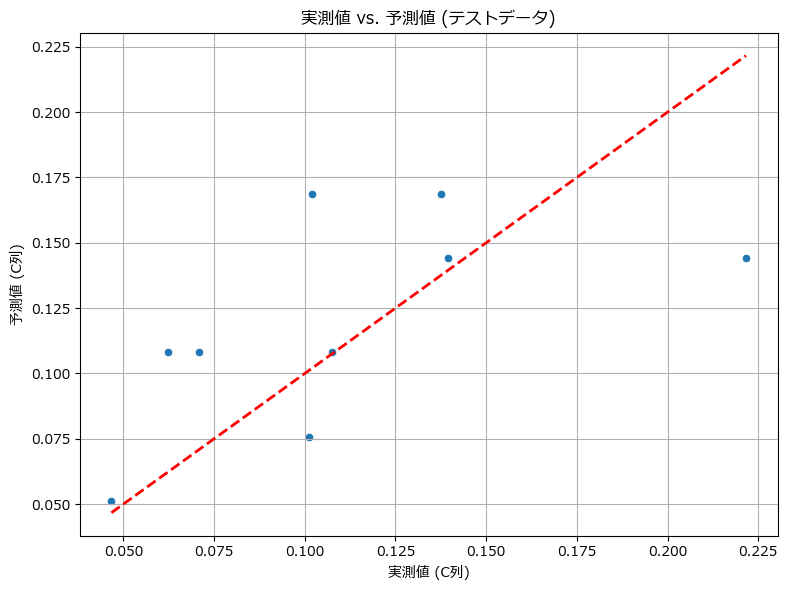

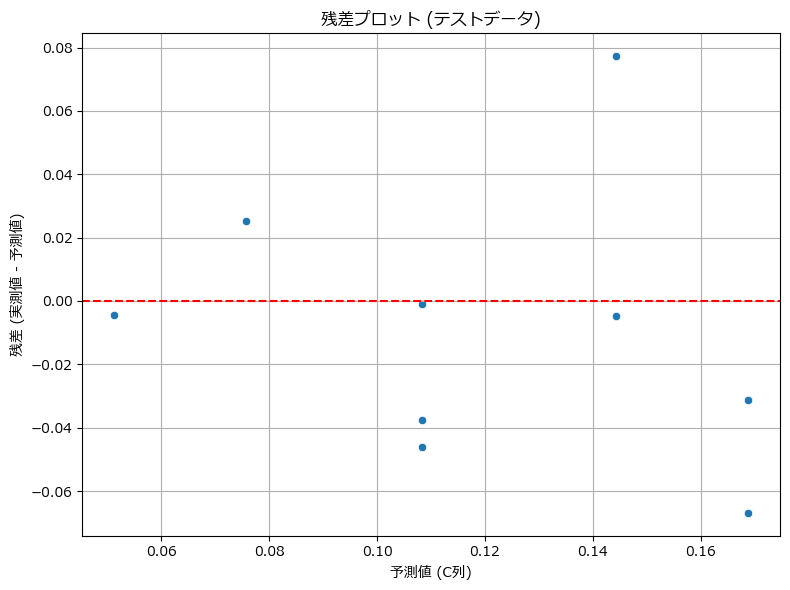


予測結果が 'predicted_resistance_reduction_with_eval.csv' に出力されました。
出力ファイル 'predicted_resistance_reduction_with_eval.csv' の最初の5行:

     半金比率  ドーピング濃度  予測_抵抗減少量
0      80      1.0  0.278842
1      81      1.0  0.278842
2      82      1.0  0.278842
3      83      1.0  0.278842
4      84      1.0  0.278842
..    ...      ...       ...
856    96      5.0  0.051196
857    97      5.0  0.051196
858    98      5.0  0.023273
859    99      5.0  0.023273
860   100      5.0  0.023273

[861 rows x 3 columns]


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. データの読み込み
try:
    df = pd.read_excel('test2.xlsx')
    print("データが正常に読み込まれました。")
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

X = df.iloc[:, :2]  # 最初の2列 (A列とB列) を入力変数とする
y = df.iloc[:, 2]   # 3列目 (C列) を目的変数とする

# 2. データの前処理 (欠損値の確認は省略)

# 3. モデルの選択と学習
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nモデルの学習を開始します...")
model.fit(X_train, y_train)
print("モデルの学習が完了しました。")

# --- ここからが実測値との比較の部分 ---

# テストデータに対する予測
y_pred_test = model.predict(X_test)

print("\n--- モデル評価 (テストデータ) ---")

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse) # RMSEはMSEの平方根
r2 = r2_score(y_test, y_pred_test)

print(f"MAE (平均絶対誤差): {mae:.4f}")
print(f"MSE (平均二乗誤差): {mse:.4f}")
print(f"RMSE (二乗平均平方根誤差): {rmse:.4f}")
print(f"R^2 (決定係数): {r2:.4f}")

# グラフによる可視化
plt.rcParams['font.family'] = 'Meiryo' # 日本語フォント設定（Windowsの場合）
# Macの場合は 'Hiragino Maru Gothic Pro' など
# Linuxの場合は 'IPA Gothic' など、環境に合わせて調整してください。
# フォントが見つからない場合は、matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf') で確認できます。


# 1. 実測値 vs. 予測値の散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 理想的なy=xの線
plt.xlabel('実測値 (C列)')
plt.ylabel('予測値 (C列)')
plt.title('実測値 vs. 予測値 (テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 残差プロット
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # 残差が0の線
plt.xlabel('予測値 (C列)')
plt.ylabel('残差 (実測値 - 予測値)')
plt.title('残差プロット (テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 予測値をCSVに出力する部分 (前回のコードから再利用)
# 半金比率の範囲: 80%から100%まで
hanekin_ratios = np.arange(80, 101, 1)

# ドーピング濃度の範囲: 1から5まで
doping_concentrations = np.arange(1, 5.1, 0.1) # 1.0, 1.1, ..., 5.0 (0.1刻み)

hanekin_mesh, doping_mesh = np.meshgrid(hanekin_ratios, doping_concentrations)

predict_data = pd.DataFrame({
    '半金比率': hanekin_mesh.ravel(),
    'ドーピング濃度': doping_mesh.ravel()
})

predicted_values = model.predict(predict_data)
predict_data['予測_抵抗減少量'] = predicted_values

output_filename = 'predicted_resistance_reduction_with_eval.csv'
predict_data.to_csv(output_filename, index=False)

print(f"\n予測結果が '{output_filename}' に出力されました。")
print(f"出力ファイル '{output_filename}' の最初の5行:\n")
print(predict_data)

データが正常に読み込まれました。

決定木モデルの学習を開始します...
決定木モデルの学習が完了しました。

--- 決定木モデル評価 (テストデータ) ---
MAE (平均絶対誤差): 0.0314
MSE (平均二乗誤差): 0.0016
RMSE (二乗平均平方根誤差): 0.0394
R^2 (決定係数): 0.3666


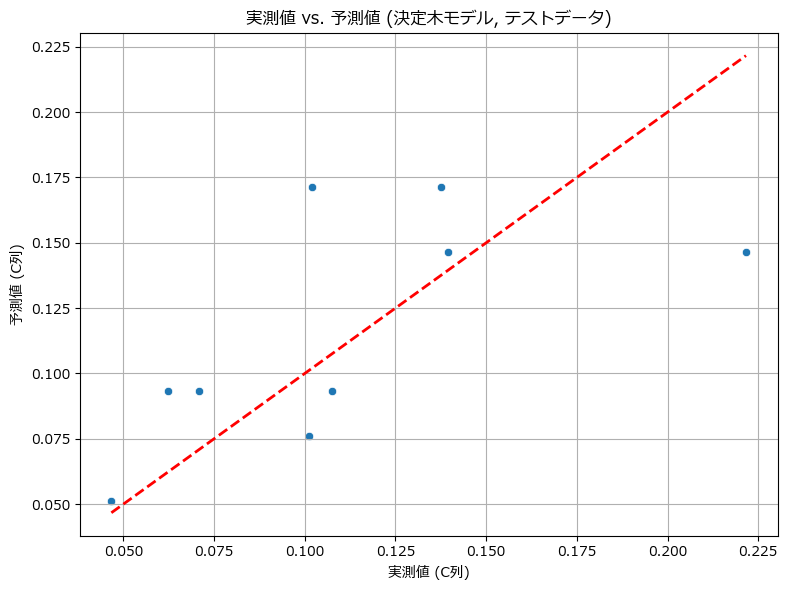

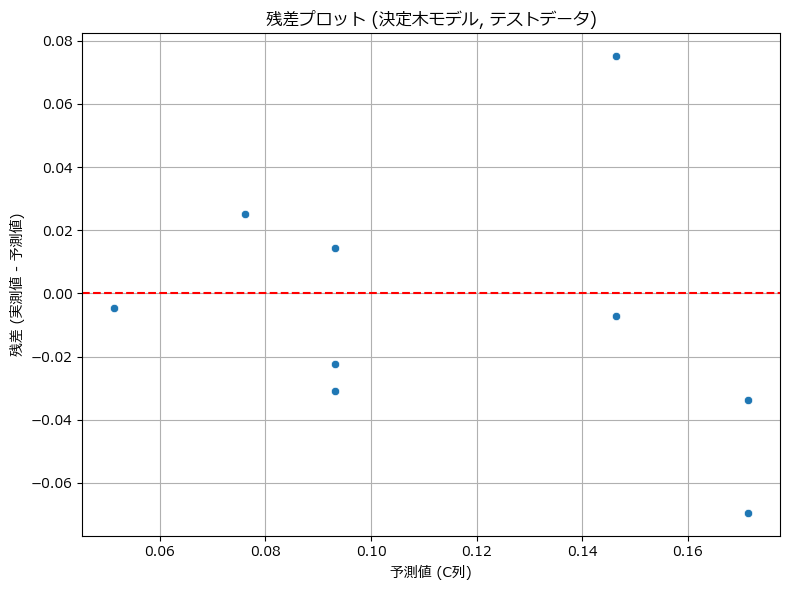


決定木モデルによる予測結果が 'predicted_resistance_reduction_decision_tree.csv' に出力されました。
出力ファイル 'predicted_resistance_reduction_decision_tree.csv' の最初の5行:

   半金比率  ドーピング濃度  予測_抵抗減少量
0    80      1.0  0.285205
1    81      1.0  0.285205
2    82      1.0  0.285205
3    83      1.0  0.285205
4    84      1.0  0.285205


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # ここを変更
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. データの読み込み
try:
    df = pd.read_excel('test2.xlsx')
    print("データが正常に読み込まれました。")
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

X = df.iloc[:, :2]  # 最初の2列 (A列とB列) を入力変数とする
y = df.iloc[:, 2]   # 3列目 (C列) を目的変数とする

# 2. データの前処理 (欠損値の確認は省略)

# 3. モデルの選択と学習
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor を DecisionTreeRegressor に変更
model = DecisionTreeRegressor(random_state=42)
# DecisionTreeRegressorにはn_estimatorsは不要です。
# max_depthなどのハイパーパラメータを調整することで、過学習を抑制したり、性能を調整できます。

print("\n決定木モデルの学習を開始します...")
model.fit(X_train, y_train)
print("決定木モデルの学習が完了しました。")

# --- モデル評価 (テストデータ) ---
y_pred_test = model.predict(X_test)

print("\n--- 決定木モデル評価 (テストデータ) ---")

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE (平均絶対誤差): {mae:.4f}")
print(f"MSE (平均二乗誤差): {mse:.4f}")
print(f"RMSE (二乗平均平方根誤差): {rmse:.4f}")
print(f"R^2 (決定係数): {r2:.4f}")

# グラフによる可視化
plt.rcParams['font.family'] = 'Meiryo' # 日本語フォント設定（Windowsの場合）
# MacやLinuxの場合、環境に合わせて調整してください。

# 1. 実測値 vs. 予測値の散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('実測値 (C列)')
plt.ylabel('予測値 (C列)')
plt.title('実測値 vs. 予測値 (決定木モデル, テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 残差プロット
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('予測値 (C列)')
plt.ylabel('残差 (実測値 - 予測値)')
plt.title('残差プロット (決定木モデル, テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 広範囲の予測とCSV出力 ---
hanekin_ratios = np.arange(80, 101, 1)
doping_concentrations = np.arange(1, 5.1, 0.1)

hanekin_mesh, doping_mesh = np.meshgrid(hanekin_ratios, doping_concentrations)

predict_data = pd.DataFrame({
    '半金比率': hanekin_mesh.ravel(),
    'ドーピング濃度': doping_mesh.ravel()
})

predicted_values = model.predict(predict_data)
predict_data['予測_抵抗減少量'] = predicted_values

output_filename_dt = 'predicted_resistance_reduction_decision_tree.csv' # ファイル名を変更
predict_data.to_csv(output_filename_dt, index=False)

print(f"\n決定木モデルによる予測結果が '{output_filename_dt}' に出力されました。")
print(f"出力ファイル '{output_filename_dt}' の最初の5行:\n")
print(predict_data.head())

データが正常に読み込まれました。

入力変数 (X) の最初の5行:
   半金比率  ドーピング濃度
0   100        1
1   100        2
2   100        4
3    95        1
4    95        2

目的変数 (y) の最初の5行:
0    0.146742
1    0.082480
2    0.042710
3    0.221636
4    0.101125
Name: 抵抗減少率, dtype: float64

欠損値の確認:
 半金比率       0
ドーピング濃度    0
抵抗減少率      0
dtype: int64

勾配ブースティング回帰モデルの学習を開始します...
勾配ブースティング回帰モデルの学習が完了しました。

--- 勾配ブースティング回帰モデル評価 (テストデータ) ---
MAE (平均絶対誤差): 0.0314
MSE (平均二乗誤差): 0.0016
RMSE (二乗平均平方根誤差): 0.0394
R^2 (決定係数): 0.3666


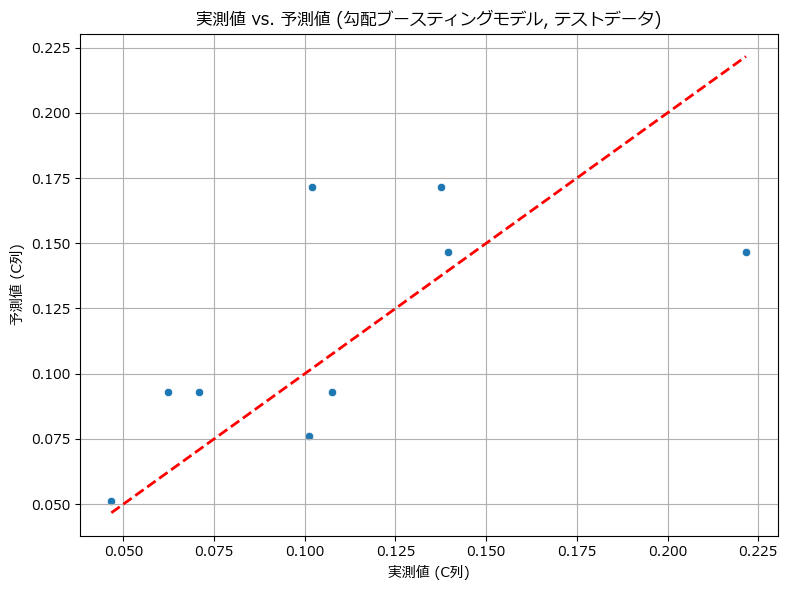

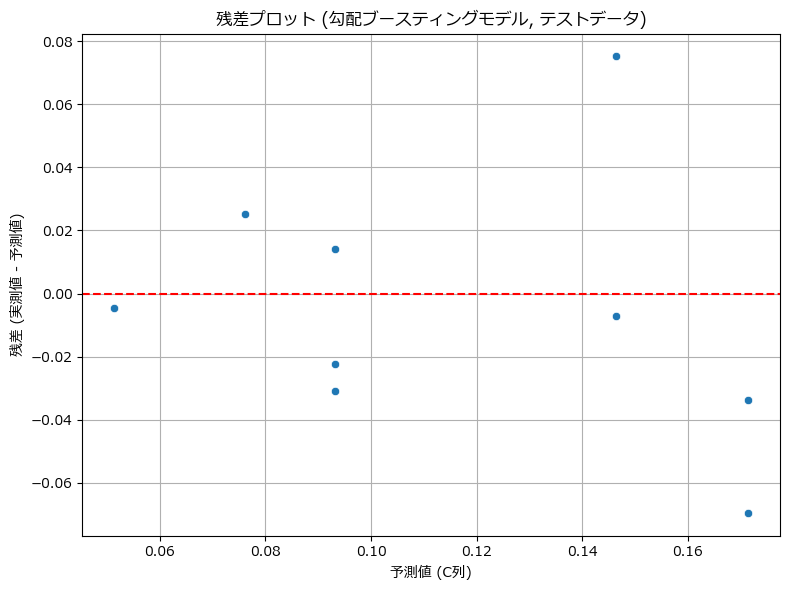


勾配ブースティング回帰モデルによる予測結果が 'predicted_resistance_reduction_gradient_boosting.csv' に出力されました。
出力ファイル 'predicted_resistance_reduction_gradient_boosting.csv' の最初の5行:

   半金比率  ドーピング濃度  予測_抵抗減少量
0    80      1.0  0.285198
1    81      1.0  0.285198
2    82      1.0  0.285198
3    83      1.0  0.285198
4    84      1.0  0.285198


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor # ★変更点：勾配ブースティングをインポート
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. データの読み込み
try:
    df = pd.read_excel('test2.xlsx')
    print("データが正常に読み込まれました。")
    # print("データの最初の5行:\n", df.head()) # 確認用
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

# ユーザーの説明に基づき、A列が半金比率、B列がドーピング濃度、C列が抵抗減少量と仮定
X = df.iloc[:, :2]  # 最初の2列 (A列とB列) を入力変数とする
y = df.iloc[:, 2]   # 3列目 (C列) を目的変数とする

print(f"\n入力変数 (X) の最初の5行:\n{X.head()}")
print(f"\n目的変数 (y) の最初の5行:\n{y.head()}")

# 2. データの前処理 (今回は欠損値の確認・処理は省略)
print("\n欠損値の確認:\n", df.isnull().sum())


# 3. モデルの選択と学習
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GradientBoostingRegressorをモデルとして選択 ★変更点
# 主要なハイパーパラメータ:
# n_estimators: 構築する決定木の数（多いほど複雑になるが、過学習のリスクも）
# learning_rate: 各木の寄与度（小さいほど学習がゆっくり進み、精度が上がる傾向があるが、n_estimatorsを増やす必要あり）
# max_depth: 各決定木の最大深度（深いほど複雑にデータを捉えるが、過学習のリスクも）
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

print("\n勾配ブースティング回帰モデルの学習を開始します...")
model.fit(X_train, y_train)
print("勾配ブースティング回帰モデルの学習が完了しました。")

# --- モデル評価 (テストデータ) ---
y_pred_test = model.predict(X_test)

print("\n--- 勾配ブースティング回帰モデル評価 (テストデータ) ---")

# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE (平均絶対誤差): {mae:.4f}")
print(f"MSE (平均二乗誤差): {mse:.4f}")
print(f"RMSE (二乗平均平方根誤差): {rmse:.4f}")
print(f"R^2 (決定係数): {r2:.4f}")

# グラフによる可視化
plt.rcParams['font.family'] = 'Meiryo' # 日本語フォント設定（Windowsの場合）
# MacやLinuxの場合、環境に合わせて調整してください。

# 1. 実測値 vs. 予測値の散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('実測値 (C列)')
plt.ylabel('予測値 (C列)')
plt.title('実測値 vs. 予測値 (勾配ブースティングモデル, テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 残差プロット
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('予測値 (C列)')
plt.ylabel('残差 (実測値 - 予測値)')
plt.title('残差プロット (勾配ブースティングモデル, テストデータ)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 広範囲の予測とCSV出力 ---
# 半金比率の範囲: 80%から100%まで
hanekin_ratios = np.arange(80, 101, 1)

# ドーピング濃度の範囲: 1から5まで
doping_concentrations = np.arange(1, 5.1, 0.1) # 1.0, 1.1, ..., 5.0 (0.1刻み)

hanekin_mesh, doping_mesh = np.meshgrid(hanekin_ratios, doping_concentrations)

predict_data = pd.DataFrame({
    '半金比率': hanekin_mesh.ravel(),
    'ドーピング濃度': doping_mesh.ravel()
})

predicted_values = model.predict(predict_data)
predict_data['予測_抵抗減少量'] = predicted_values

output_filename_gbr = 'predicted_resistance_reduction_gradient_boosting.csv' # ファイル名を変更
predict_data.to_csv(output_filename_gbr, index=False)

print(f"\n勾配ブースティング回帰モデルによる予測結果が '{output_filename_gbr}' に出力されました。")
print(f"出力ファイル '{output_filename_gbr}' の最初の5行:\n")
print(predict_data.head())

データの基本統計量:
              半金比率    ドーピング濃度      抵抗減少率
count   45.000000  45.000000  45.000000
mean    95.000000   2.333333   0.108944
std      4.128614   1.261312   0.090341
min     90.000000   1.000000   0.000556
25%     90.000000   1.000000   0.046670
50%     95.000000   2.000000   0.087232
75%    100.000000   4.000000   0.137596
max    100.000000   4.000000   0.384548

ドーピング濃度のユニークな値:
 [1 2 4]

ドーピング濃度の値の数:
 ドーピング濃度
1    15
2    15
4    15
Name: count, dtype: int64

相関行列:
                  半金比率       ドーピング濃度     抵抗減少率
半金比率     1.000000e+00  6.202125e-17 -0.538916
ドーピング濃度  6.202125e-17  1.000000e+00 -0.548512
抵抗減少率   -5.389156e-01 -5.485116e-01  1.000000


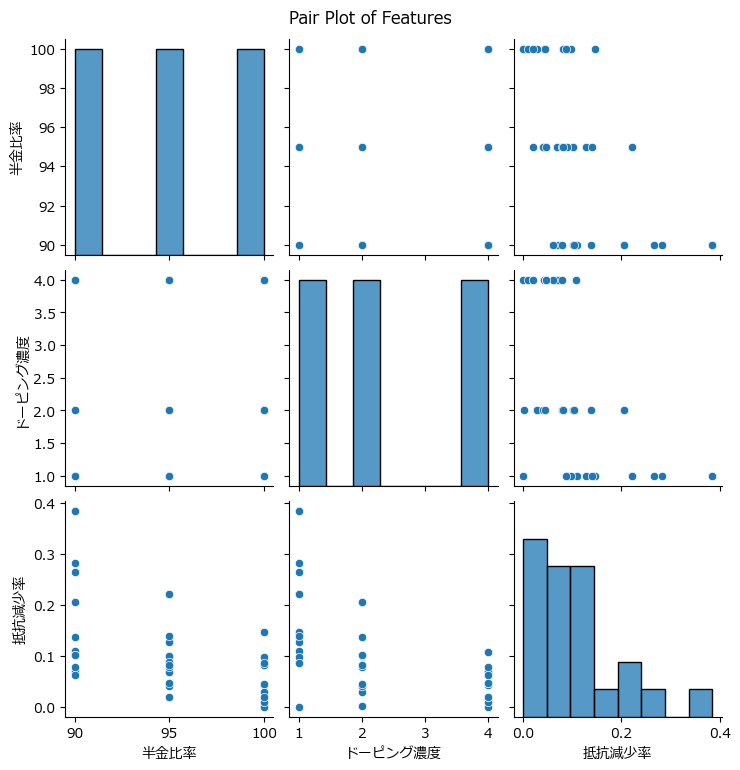

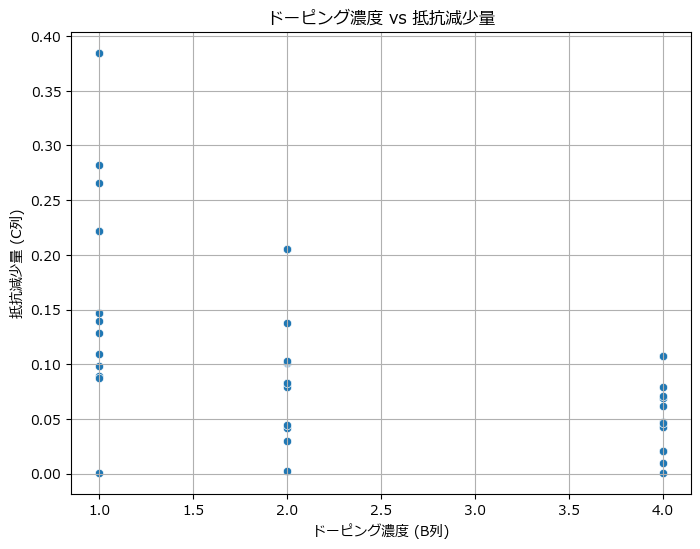

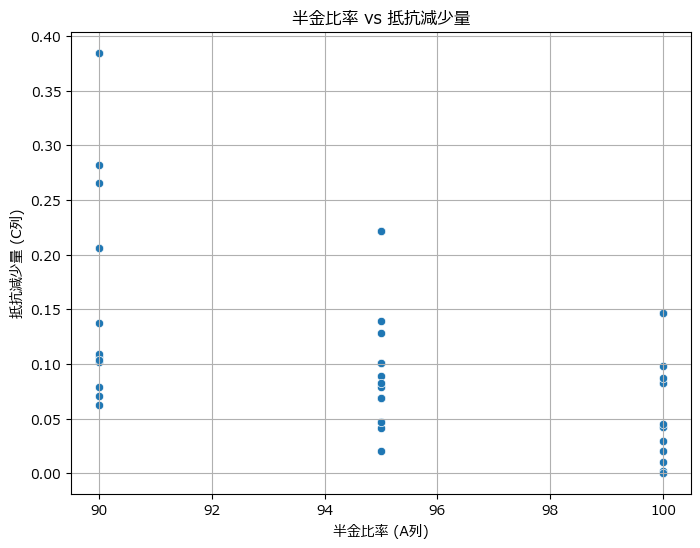

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    df = pd.read_excel('test2.xlsx')
except FileNotFoundError:
    print("ファイル 'test2.xlsx - Sheet1.csv' が見つかりません。ファイル名を確認してください。")
    exit()

print("データの基本統計量:\n", df.describe())
print("\nドーピング濃度のユニークな値:\n", df.iloc[:, 1].unique())
print("\nドーピング濃度の値の数:\n", df.iloc[:, 1].value_counts())

# 相関行列
print("\n相関行列:\n", df.corr())

# 散布図行列 (全ての変数間の関係を視覚化)
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02) # タイトル
plt.show()

# ドーピング濃度と抵抗減少量の散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2])
plt.xlabel('ドーピング濃度 (B列)')
plt.ylabel('抵抗減少量 (C列)')
plt.title('ドーピング濃度 vs 抵抗減少量')
plt.grid(True)
plt.show()

# 半金比率と抵抗減少量の散布図
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2])
plt.xlabel('半金比率 (A列)')
plt.ylabel('抵抗減少量 (C列)')
plt.title('半金比率 vs 抵抗減少量')
plt.grid(True)
plt.show()